In [1]:
%display latex
from ulbc import *
from flowstar import *
from ulbc.bondcalculus import *

In [2]:
R.<x1,x2,x3,x4,x5,x6,x7,x8,x9> = RIF[]

In [3]:
y = vector([
    10*x3 - RIF('0.1')*x1*x6,
    100*x4 - x1*x2,
    RIF('0.1')*x1*x6 - 50*x3,
    x2*x6 - 100*x4,
    5*x3 + RIF('0.5')*x1 - 10*x5,
    50*x5 + 50*x3 + 100*x4 - x6*(RIF('0.1')*x1 + x2 + 2*x8 + 1),
    50*x4 + RIF('0.01')*x2 - RIF('0.5')*x7,
    RIF('0.5')*x7 - 2*x6*x8 + x9 - RIF('0.2')*x8,
    2*x6*x8 - x9,
])

In [4]:
y

(-0.10000000000000000?*x1*x6 + 10*x3, -x1*x2 + 100*x4, 0.10000000000000000?*x1*x6 - 50*x3, x2*x6 - 100*x4, 0.50000000000000000?*x1 + 5*x3 - 10*x5, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, 0.01000000000000000?*x2 + 50*x4 - 0.50000000000000000?*x7, -2*x6*x8 + 0.50000000000000000?*x7 - 0.2000000000000000?*x8 + x9, 2*x6*x8 - x9)

In [5]:
table([[yi] for yi in y])

""
""
""
""
""
""
""
""
""


In [6]:
y0 = [
    RIF('[0.98, 1.02]'),
    RIF('[1.28, 1.32]'),
    RIF('[0.08, 0.12]'),
    RIF('[0.08, 0.12]'), # x4
    RIF('[0.08, 0.12]'),
    RIF('[1.28, 1.32]'), # x6
    RIF('[2.48, 2.52]'),
    RIF('[0.58, 0.62]'),
    RIF('[1.28, 1.32]'),
]

In [7]:
table([y0i.endpoints() for y0i in y0])

,
,
,
,
,
,
,
,
,


In [8]:
R

Multivariate Polynomial Ring in x1, x2, x3, x4, x5, x6, x7, x8, x9 over Real Interval Field with 53 bits of precision

In [9]:
sys = System(R, R.gens(), y0, y); sys

System(R, (x1, x2, x3, x4, x5, x6, x7, x8, x9), [[0.97999999999999998 .. 1.0200000000000001], [1.2799999999999998 .. 1.3200000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [1.2799999999999998 .. 1.3200000000000001], [2.4799999999999999 .. 2.5200000000000001], [0.57999999999999996 .. 0.62000000000000011], [1.2799999999999998 .. 1.3200000000000001]], (-0.10000000000000000?*x1*x6 + 10*x3, -x1*x2 + 100*x4, 0.10000000000000000?*x1*x6 - 50*x3, x2*x6 - 100*x4, 0.50000000000000000?*x1 + 5*x3 - 10*x5, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, 0.01000000000000000?*x2 + 50*x4 - 0.50000000000000000?*x7, -2*x6*x8 + 0.50000000000000000?*x7 - 0.2000000000000000?*x8 + x9, 2*x6*x8 - x9), varmap=bidict({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8, 'x9': x9}))

In [10]:
RReal = RR['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']

In [11]:
RReal(sys.y[2])

0.100000000000000*x1*x6 - 50.0000000000000*x3

In [12]:
sys_real = System(
    RReal,
    RReal.gens(),
    [y0i.center() for y0i in sys.y0],
    [RReal(yi) for yi in sys.y],
)
sys_real

System(R, (x1, x2, x3, x4, x5, x6, x7, x8, x9), [1, [1.2999999999999998 .. 1.2999999999999999], [0.10000000000000000 .. 0.10000000000000001], [0.10000000000000000 .. 0.10000000000000001], [0.10000000000000000 .. 0.10000000000000001], [1.2999999999999998 .. 1.2999999999999999], [2.5000000000000000 .. 2.5000000000000000], [0.60000000000000008 .. 0.60000000000000009], [1.2999999999999998 .. 1.2999999999999999]], (-0.100000000000000*x1*x6 + 10.0000000000000*x3, -x1*x2 + 100.000000000000*x4, 0.100000000000000*x1*x6 - 50.0000000000000*x3, x2*x6 - 100.000000000000*x4, 0.500000000000000*x1 + 5.00000000000000*x3 - 10.0000000000000*x5, -0.100000000000000*x1*x6 - x2*x6 - 2.00000000000000*x6*x8 + 50.0000000000000*x3 + 100.000000000000*x4 + 50.0000000000000*x5 - x6, 0.0100000000000000*x2 + 50.0000000000000*x4 - 0.500000000000000*x7, -2.00000000000000*x6*x8 + 0.500000000000000*x7 - 0.200000000000000*x8 + x9, 2.00000000000000*x6*x8 - x9), varmap=bidict({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8, 'x9': x9}))

In [13]:
y0_real = [y0i.center() for y0i in sys.y0]
table([[y0i] for y0i in y0_real])

""
""
""
""
""
""
""
""
""


In [14]:
timepoints = srange(0,10,0.1)

In [15]:
sln = desolve_odeint(sys_real.y, y0_real, timepoints, list(sys_real.x))

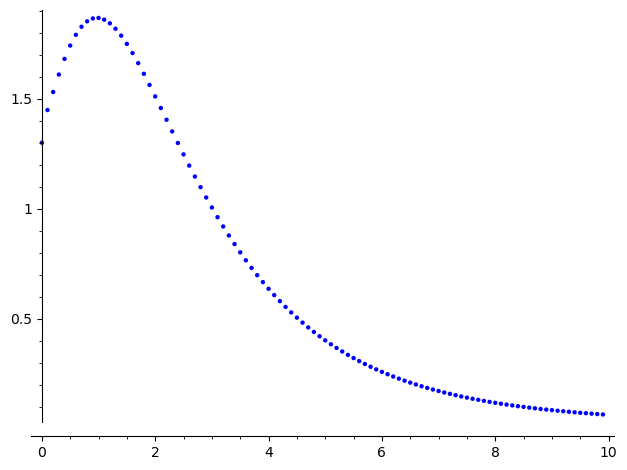

In [16]:
points(zip(timepoints, [yi[1] for yi in sln]))

In [17]:
from scipy.integrate import solve_ivp
from ulbc.matricies import vec_to_numpy, mat_to_numpy, convert_vec, sympy_gens

In [18]:
f = vec_to_numpy(RReal, sys_real.y)
jac = mat_to_numpy(RReal, sage.jacobian(sys_real.y, sys_real.x))

In [19]:
sln = solve_ivp(f,
                (0, 10),
                y0_real,
                method='LSODA',
                jac=jac,
                vectorized=True,
                dense_output=True)

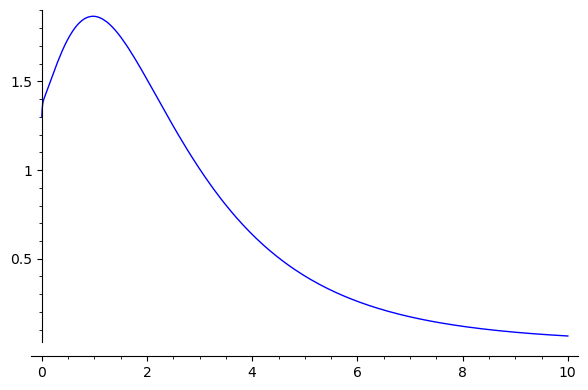

In [25]:
plot(lambda t: sln.sol(t)[1], (0, 10))

In [26]:
import time
t0 = time.time()
r = sys.reach(
    3, order=4, step=0.003,
    precondition=1,
    estimation=1e-1,
    max_remainder_queue=200,
    integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
    cutoff_threshold=1e-6)
t1 = time.time()
print(f"Reachability done in {t1 - t0}")

calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Reachability done in 65.75015139579773


In [27]:
r.num_flowpipes

1000

var_id_x = 2
var_id_y = 4


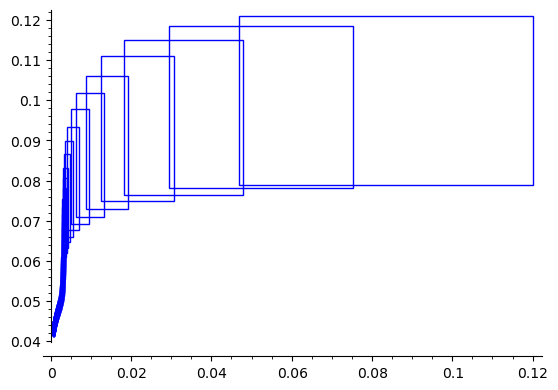

In [28]:
r.sage_interval_plot('x3', 'x5', 0.01)

var_id_x = 3
var_id_y = 5


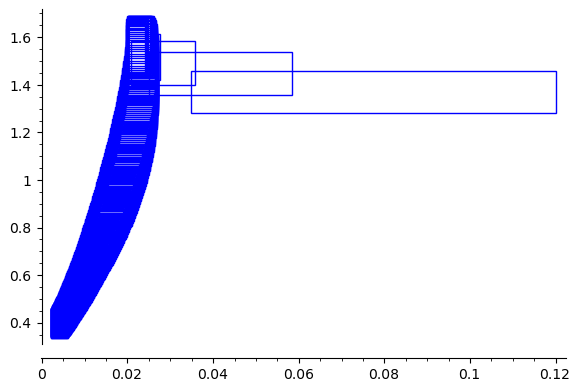

In [33]:
out = r.sage_interval_plot('x4', 'x6', 0.01)
out.set_aspect_ratio(1/18)
out

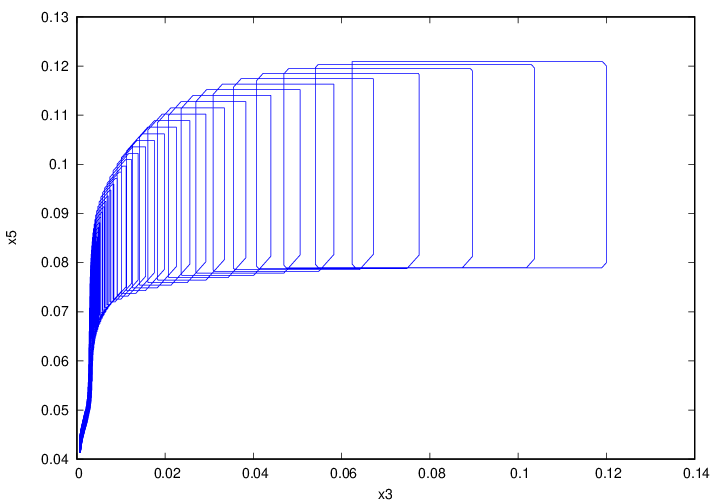

In [32]:
r.wplot('x3', 'x5')

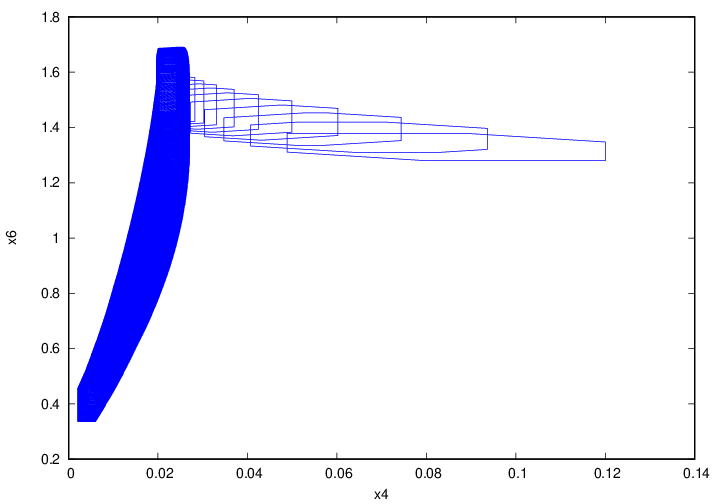

In [33]:
r.wplot('x4', 'x6')

In [60]:
sys_real.varmap

bidict({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8, 'x9': x9})

In [68]:
fl = lambda t: r(RIF(t))[5].lower()
fu = lambda t: r(RIF(t))[5].upper()
gl = lambda t: r(RIF(t))[3].lower()
gu = lambda t: r(RIF(t))[3].upper()

In [72]:
fl(0), fu(0)

(1.27994857010101, 1.32005885676383)

In [70]:
gl(0), gu(0)

(0.0799454261676199, 0.120047556972802)

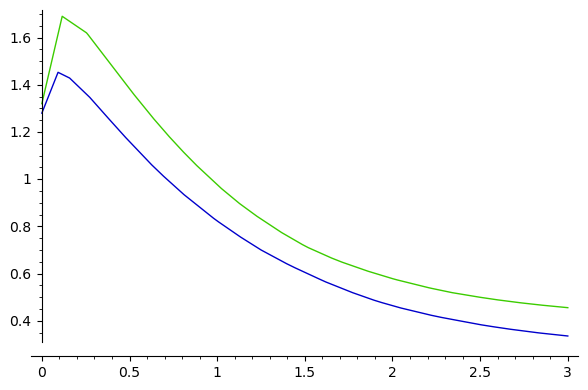

In [69]:
plot((fl, fu), (0, 3), plot_points=30, adaptive_recursion=0, randomize=False)

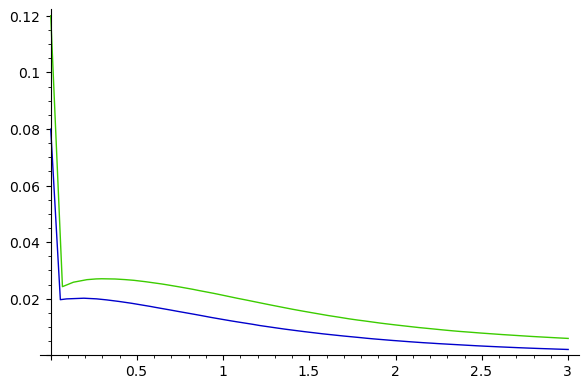

In [71]:
plot((gl, gu), (0, 3), plot_points=50, adaptive_recursion=0, randomize=False)

In [73]:
sig = F([0, 0.5], Atomic(var("x6") > 1.4) & G([0, 0.1], Atomic(var("x6") < 1.8)  & F([0, 1], Atomic(var("x6") < 1) & Atomic(var("x4") < 0.02)))).signal(r)
sig

PolyObserver(x6 - 1.4000000000000000?, <flowstar.reachability.Reach object at 0x563e14e21830>, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6 symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
symbolic_composition=False, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
roots = [[0.0048028783727901138 .. 0.020435765977123051], [0.20345478283219919 .. 0.48300000000000043]]
domain = [0.0000000000000000 .. 2.9990000000000002]
roots = [[0.0048028783727901138 .. 0.020435765977123051], 
 [0.20345478283219919 .. 0.48300000000000043]]
seg_domain = [0.0000000000000000 .. 2.9990000000000002]
roots = [[0.0048028783727901138 .. 0.020435765977123051], 
 [0.20345478283219919 .. 0.48300000000000043]]
In G.signal
PolyObserver(-x6 + 1.8000000000000001?, <flowstar.reachability.Reach object at 0x563e14e21830>, 0.10000000000000000?*x1*x6 + x2*x6 + 2*x6*x8 - 50*x3 - 100*x4 - 50*x5 + x6 symbolic_composition=False, tentati

Signal([0.0000000000000000 .. 2.9990000000000002], [([0.0000000000000000 .. 0.20345478283219920], True), ([0.48300000000000042 .. 2.4990000000000002], False)], mask=None)

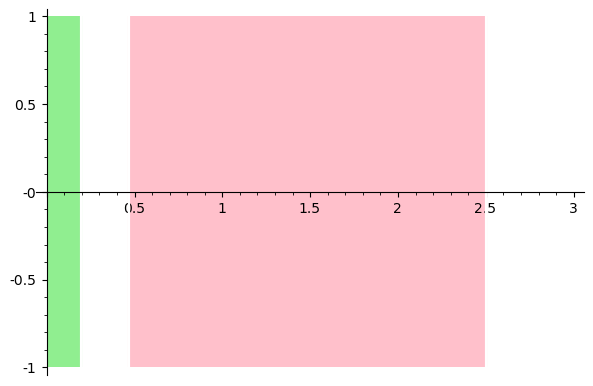

In [74]:
sig.plot()

In [75]:
sig = Atomic(var("x6") < 0.8).signal(r, tentative_unpreconditioning=True, symbolic_composition=True)
sig

PolyObserver(-x6 + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x563e14e21830>, 0.10000000000000000?*x1*x6 + x2*x6 + 2*x6*x8 - 50*x3 - 100*x4 - 50*x5 + x6 symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
symbolic_composition=True, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
roots = [[1.0796391231884567 .. 1.2706258843523169]]
domain = [0.0000000000000000 .. 2.9990000000000002]
roots = [[1.0796391231884567 .. 1.2706258843523169]]
seg_domain = [0.0000000000000000 .. 2.9990000000000002]
roots = [[1.0796391231884567 .. 1.2706258843523169]]


Signal([0.0000000000000000 .. 2.9990000000000002], [([0.0000000000000000 .. 1.0796391231884568], False), ([1.2706258843523168 .. 2.9990000000000002], True)], mask=None)

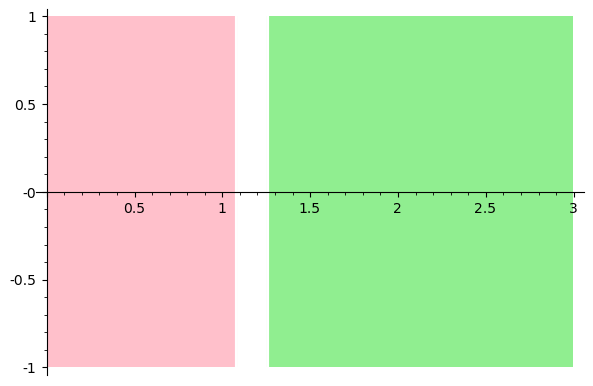

In [76]:
sig.plot()

In [77]:
import time
t0 = time.time()
r = sys.reach(
    5, order=5, step=(0.001, 0.003),
    precondition=1,
    estimation=1e-1,
    max_remainder_queue=200,
    integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
    cutoff_threshold=1e-6)
t1 = time.time()
print(f"Reachability done in {t1 - t0}")

calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Reachability done in 595.5126178264618


In [78]:
r.res

2

In [79]:
r.num_flowpipes

1667

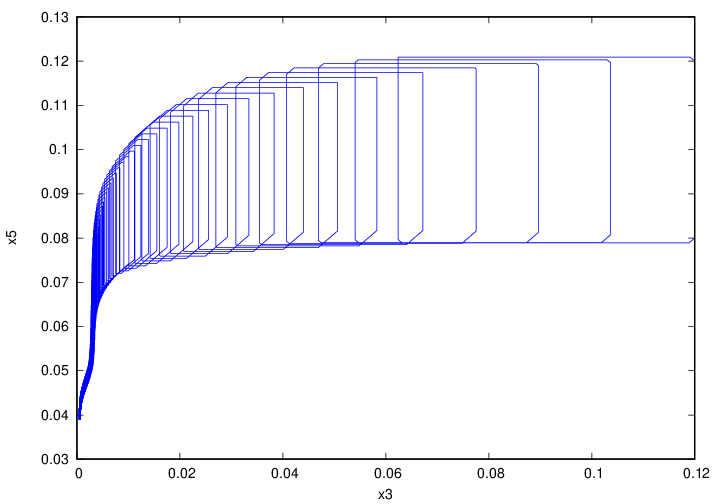

In [80]:
r.wplot('x3', 'x5')

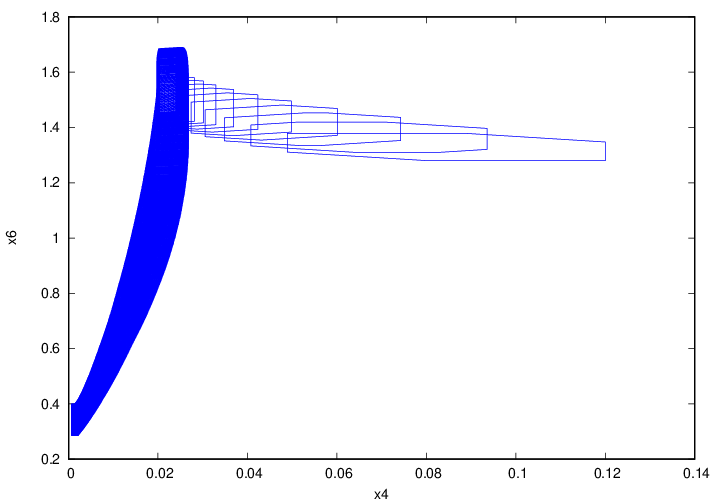

In [81]:
r.wplot('x4', 'x6')

In [82]:
table([r(RIF(t, t+0.1))[5].endpoints() for t in srange(0, 2, 0.1)])

,
,
,
,
,
,
,
,
,
,
,


In [83]:
fl = lambda t: r(RIF(t))[5].lower()
fu = lambda t: r(RIF(t))[5].upper()
gl = lambda t: r(RIF(t))[3].lower()
gu = lambda t: r(RIF(t))[3].upper()

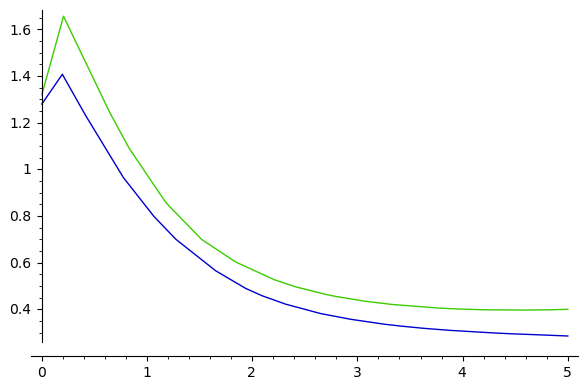

In [84]:
plot((fl, fu), (0, 5), plot_points=20, adaptive_recursion=0, randomize=False)

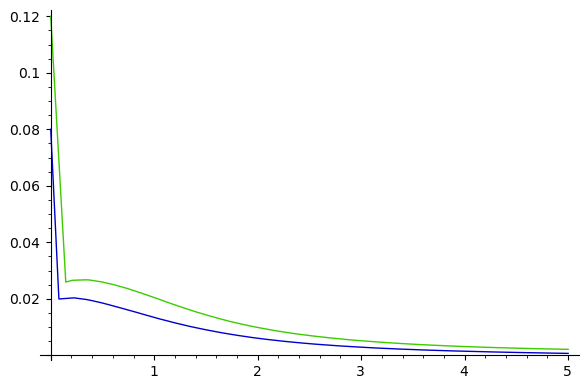

In [86]:
plot((gl, gu), (0, 5), plot_points=50, adaptive_recursion=0, randomize=False)

In [87]:
sig = Atomic(var("x4") > RIF('0.005')).signal(r)

PolyObserver(x4 - 0.005000000000000000?, <flowstar.reachability.Reach object at 0x563e29d78290>, x2*x6 - 100*x4 symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
symbolic_composition=False, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
roots = [[2.2406423211866233 .. 2.2410000000000481], [2.2425044607049184 .. 3.0510000000000788], [3.0528052100882212 .. 3.0528053276883225], [3.0530417999370058 .. 3.0530418027122961], [3.0530475805666061 .. 3.0530476466286461], [3.0531591902591088 .. 3.0531592012327833], [3.0532132923317822 .. 3.0532132954896616], [3.0532414608090672 .. 3.0532414668517474], [3.0532523572517011 .. 3.0540000000000789]]
domain = [0.0000000000000000 .. 4.9989999999999997]
roots = [[2.2406423211866233 .. 2.2410000000000481], 
 [2.2425044607049184 .. 3.0510000000000788], 
 [3.0528052100882212 .. 3.0528053276883225], 
 [3.0530417999370058 .. 3.0530418027122961], 
 [3.0530475805666061 .. 3.0530476466286461], 
 [3.05

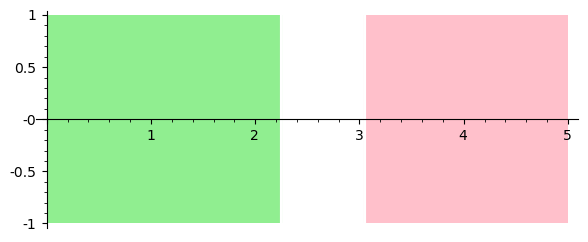

In [88]:
sig.plot()

In [89]:
sig = F(RIF(0, 3), Atomic(var("x6") < RIF('0.8')) & Atomic(var("x4") > RIF('0.005'))).signal(r)

PolyObserver(-x6 + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x563e29d78290>, 0.10000000000000000?*x1*x6 + x2*x6 + 2*x6*x8 - 50*x3 - 100*x4 - 50*x5 + x6 symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
symbolic_composition=False, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
roots = [[1.0614338445651976 .. 1.2930000000000120]]
domain = [0.0000000000000000 .. 4.9989999999999997]
roots = [[1.0614338445651976 .. 1.2930000000000120]]
seg_domain = [0.0000000000000000 .. 4.9989999999999997]
roots = [[1.0614338445651976 .. 1.2930000000000120]]
PolyObserver(x4 - 0.005000000000000000?, <flowstar.reachability.Reach object at 0x563e29d78290>, x2*x6 - 100*x4 symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
symbolic_composition=False, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
roots = [[2.2406423211866233 .. 2.2410000000000481], [2.2425044607049184 .. 

In [90]:
sig(0)

True

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


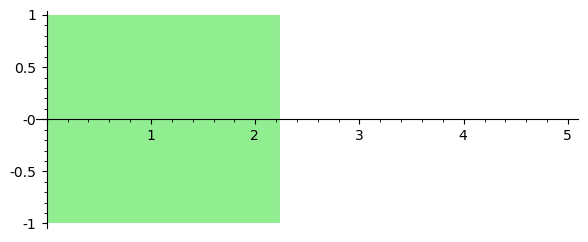

In [91]:
sig.plot()

In [92]:
sig = F([0, 0.5], Atomic(var("x6") > 1.4) & G([0, 0.1], Atomic(var("x6") < 1.8)  & F([0, 1], Atomic(var("x6") < 1) & Atomic(var("x4") < 0.02)))).signal(r)
sig

PolyObserver(x6 - 1.4000000000000000?, <flowstar.reachability.Reach object at 0x563e29d78290>, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6 symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
symbolic_composition=False, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
roots = [[0.0048105735749824603 .. 0.020234134245513097], [0.20569603978972222 .. 0.47844966933866984]]
domain = [0.0000000000000000 .. 4.9989999999999997]
roots = [[0.0048105735749824603 .. 0.020234134245513097], 
 [0.20569603978972222 .. 0.47844966933866984]]
seg_domain = [0.0000000000000000 .. 4.9989999999999997]
roots = [[0.0048105735749824603 .. 0.020234134245513097], 
 [0.20569603978972222 .. 0.47844966933866984]]
In G.signal
PolyObserver(-x6 + 1.8000000000000001?, <flowstar.reachability.Reach object at 0x563e29d78290>, 0.10000000000000000?*x1*x6 + x2*x6 + 2*x6*x8 - 50*x3 - 100*x4 - 50*x5 + x6 symbolic_composition=False, tentati

Signal([0.0000000000000000 .. 4.9989999999999997], [([0.0000000000000000 .. 0.20569603978972223], True), ([0.47844966933866983 .. 4.4989999999999997], False)], mask=None)

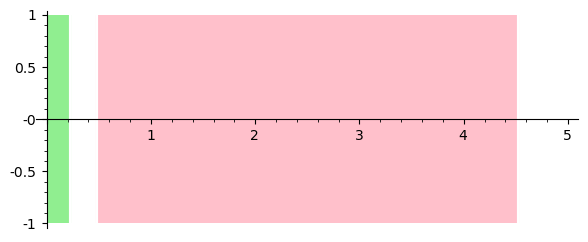

In [93]:
sig.plot()

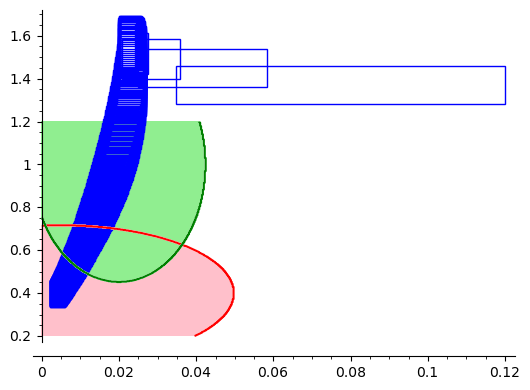

In [163]:
def f(x4, x6):
    return (  (1/(0.002))*(x4 - 0.005)**2
            + (1/(0.1))*(x6 - 0.4)**2
            <= 1  )
def g(x4, x6):
    return (  (1/(0.0005))*(x4 - 0.02)**2
            + (1/(0.3))*(x6 - 1)**2
            <= 1  )

out1 = (out
        + region_plot(f, (x4, 0, 0.12), (x6, 0.2, 1.2), incol='pink', plot_points=500, bordercol='red')
        + region_plot(g, (x4, 0, 0.12), (x6, 0.2, 1.2), incol='lightgreen', plot_points=500, bordercol='green'))
out1.set_aspect_ratio(1/18)
out1

In [159]:
sig = Atomic(f(var("x4"), var("x6"))).signal(r)

PolyObserver(-500*x4^2 - 10*x6^2 + 5.000000000000001?*x4 + 8.000000000000001?*x6 - 0.612500000000000?, <flowstar.reachability.Reach object at 0x563e29d78290>, -1000*x2*x4*x6 + 2.000000000000000?*x1*x6^2 + 20*x2*x6^2 + 40*x6^2*x8 + 100000*x4^2 - 0.8000000000000000?*x1*x6 - 3*x2*x6 - 1000*x3*x6 - 2000*x4*x6 - 1000*x5*x6 + 20*x6^2 - 16*x6*x8 + 400*x3 + 300*x4 + 400*x5 - 8*x6 symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
symbolic_composition=False, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
roots = [[1.2136040415220405 .. 1.5330000000000211]]
domain = [0.0000000000000000 .. 4.9989999999999997]
roots = [[1.2136040415220405 .. 1.5330000000000211]]
seg_domain = [0.0000000000000000 .. 4.9989999999999997]
roots = [[1.2136040415220405 .. 1.5330000000000211]]


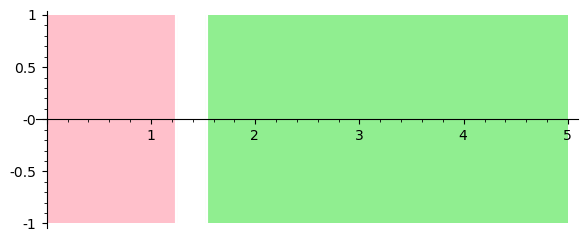

In [160]:
sig.plot()

In [164]:
sig = Atomic(g(var("x4"),var("x6"))).signal(r)
sig

PolyObserver(-2000*x4^2 - 3.3333333333333335?*x6^2 + 80.00000000000001?*x4 + 6.6666666666666670?*x6 - 3.133333333333333?, <flowstar.reachability.Reach object at 0x563e29d78290>, -4000*x2*x4*x6 + 0.6666666666666667?*x1*x6^2 + 6.6666666666666670?*x2*x6^2 + 13.333333333333334?*x6^2*x8 + 400000*x4^2 - 0.6666666666666667?*x1*x6 + 73.3333333333334?*x2*x6 - 333.3333333333334?*x3*x6 - 666.6666666666667?*x4*x6 - 333.3333333333334?*x5*x6 + 6.6666666666666670?*x6^2 - 13.333333333333334?*x6*x8 + 333.3333333333334?*x3 - 7333.333333333334?*x4 + 333.3333333333334?*x5 - 6.6666666666666670?*x6 symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
symbolic_composition=False, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
roots = [[0.0077078712057792788 .. 0.61500000000000055], [1.4786504476904769 .. 1.4790000000000190], [1.4805048596246255 .. 2.4480000000000560]]
domain = [0.0000000000000000 .. 4.9989999999999997]
roots = [[0.0077078712057792788 

Signal([0.0000000000000000 .. 4.9989999999999997], [([0.0000000000000000 .. 0.0077078712057792789], False), ([0.61500000000000054 .. 1.4786504476904770], True), ([1.4790000000000189 .. 1.4805048596246256], True), ([2.4480000000000559 .. 4.9989999999999997], False)], mask=None)

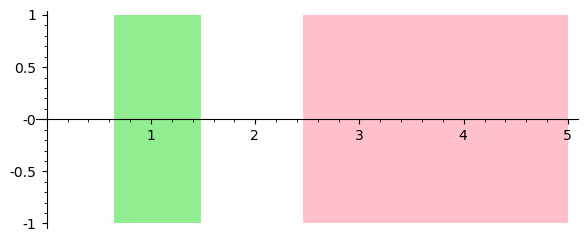

In [165]:
sig.plot()

In [166]:
sig = F(RIF(0,1), Atomic(g(var("x4"),var("x6")))).signal(r)
sig

PolyObserver(-2000*x4^2 - 3.3333333333333335?*x6^2 + 80.00000000000001?*x4 + 6.6666666666666670?*x6 - 3.133333333333333?, <flowstar.reachability.Reach object at 0x563e29d78290>, -4000*x2*x4*x6 + 0.6666666666666667?*x1*x6^2 + 6.6666666666666670?*x2*x6^2 + 13.333333333333334?*x6^2*x8 + 400000*x4^2 - 0.6666666666666667?*x1*x6 + 73.3333333333334?*x2*x6 - 333.3333333333334?*x3*x6 - 666.6666666666667?*x4*x6 - 333.3333333333334?*x5*x6 + 6.6666666666666670?*x6^2 - 13.333333333333334?*x6*x8 + 333.3333333333334?*x3 - 7333.333333333334?*x4 + 333.3333333333334?*x5 - 6.6666666666666670?*x6 symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
symbolic_composition=False, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
roots = [[0.0077078712057792788 .. 0.61500000000000055], [1.4786504476904769 .. 1.4790000000000190], [1.4805048596246255 .. 2.4480000000000560]]
domain = [0.0000000000000000 .. 4.9989999999999997]
roots = [[0.0077078712057792788 

Signal([0.0000000000000000 .. 4.9989999999999997], [([0.0000000000000000 .. 1.4805048596246256], True), ([2.4480000000000559 .. 3.9989999999999997], False)], mask=None)

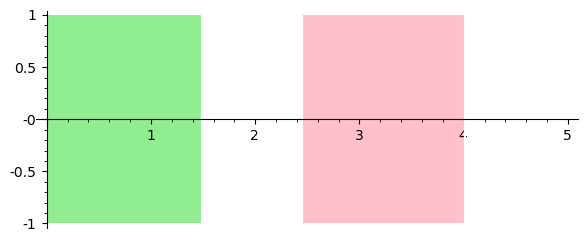

In [167]:
sig.plot()

In [170]:
sig = F(RIF(0,1),
        Atomic(g(var("x4"),var("x6")))
        & F(RIF(0, 1),
            G(RIF(0, 1),
              Atomic(f(var("x4"), var("x6")))))).signal(r)
sig

PolyObserver(-2000*x4^2 - 3.3333333333333335?*x6^2 + 80.00000000000001?*x4 + 6.6666666666666670?*x6 - 3.133333333333333?, <flowstar.reachability.Reach object at 0x563e29d78290>, -4000*x2*x4*x6 + 0.6666666666666667?*x1*x6^2 + 6.6666666666666670?*x2*x6^2 + 13.333333333333334?*x6^2*x8 + 400000*x4^2 - 0.6666666666666667?*x1*x6 + 73.3333333333334?*x2*x6 - 333.3333333333334?*x3*x6 - 666.6666666666667?*x4*x6 - 333.3333333333334?*x5*x6 + 6.6666666666666670?*x6^2 - 13.333333333333334?*x6*x8 + 333.3333333333334?*x3 - 7333.333333333334?*x4 + 333.3333333333334?*x5 - 6.6666666666666670?*x6 symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
symbolic_composition=False, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
roots = [[0.0077078712057792788 .. 0.61500000000000055], [1.4786504476904769 .. 1.4790000000000190], [1.4805048596246255 .. 2.4480000000000560]]
domain = [0.0000000000000000 .. 4.9989999999999997]
roots = [[0.0077078712057792788 

Signal([0.0000000000000000 .. 4.9989999999999997], [([0.0000000000000000 .. 1.4805048596246256], True), ([2.4480000000000559 .. 3.9989999999999997], False)], mask=None)

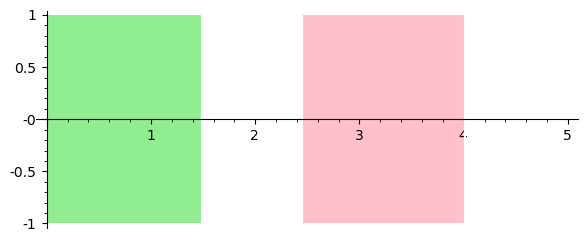

In [171]:
sig.plot()

In [174]:
def test_monitoring(prop, duration, **kwargs):
    t0 = time.time()
    sig = prop.signal_for_system(sys,
    duration,
    order=5, step=(0.001, 0.003),
    precondition=1,
    estimation=1e-1,
    max_remainder_queue=200,
    integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
    cutoff_threshold=1e-6,
    **kwargs)
    t1 = time.time()
    print(f"Run done in {t1 - t0} sec\noptions: {repr(kwargs)}")
    return t1 - t0, sig

In [201]:
prop = F(RIF(0,1),
         Atomic(g(var("x4"),var("x6")))
       & F(RIF(0, 1),
           G(RIF(0, 1),
             Atomic(f(var("x4"), var("x6"))))))

In [175]:
test_monitoring(prop, 2)[1].plot()

Precomposed systems in 0.0001304149627685547 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 1667 flowpipes in 703.8361475467682 sec
PolyObserver(-2000*x4^2 - 3.3333333333

(915.3714582920074,
 Signal([0.0000000000000000 .. 2.0000000000000000], [([0.0000000000000000 .. 1.4805048596246256], True)], mask=None))

Precomposed systems in 8.416175842285156e-05 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 1667 flowpipes in 730.571681022644 sec
PolyObserver(-2000*x4^2 - 3.33333333333

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


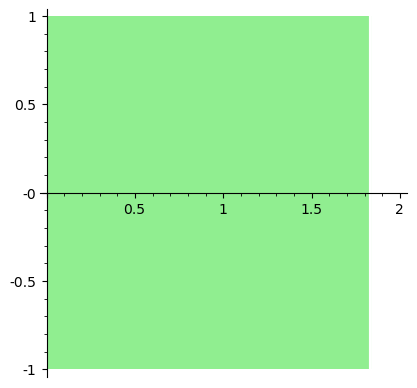

In [176]:
test_monitoring(prop, 2, symbolic_composition=True)[1].plot()

Precomposed systems in 5.435943603515625e-05 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 1667 flowpipes in 727.1947240829468 sec
PolyObserver(-2000*x4^2 - 3.3333333333

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


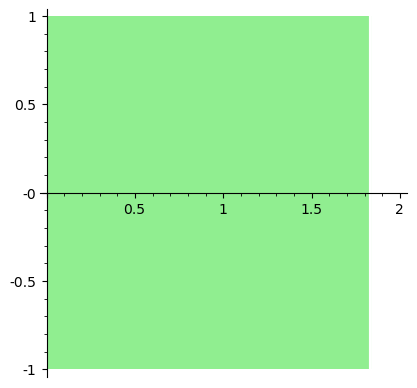

In [177]:
test_monitoring(prop, 2, symbolic_composition=True, use_masks=True)[1].plot()

Precomposed systems in 5.14984130859375e-05 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 1667 flowpipes in 841.3274893760681 sec
PolyObserver(-2000*x4^2 - 3.33333333333

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


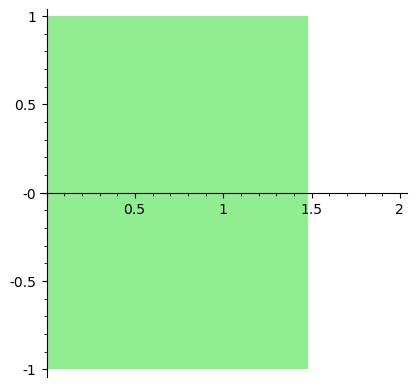

In [202]:
test_monitoring(prop, 2, symbolic_composition=False, use_masks=True)[1].plot()

Precomposed systems in 6.198883056640625e-06 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 945.8285827636719 sec
PolyObserver(-x8 + 0.80000000000000005

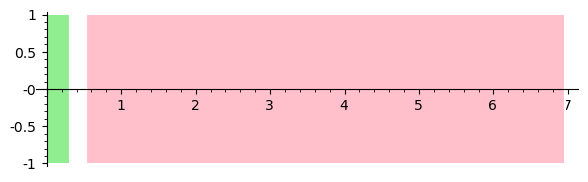

In [178]:
test_monitoring(Atomic(var("x8") <= 0.8), 7)[1].plot()

Precomposed systems in 5.7220458984375e-06 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 990.9961965084076 sec
PolyObserver(-x8 + 0.80000000000000005?,

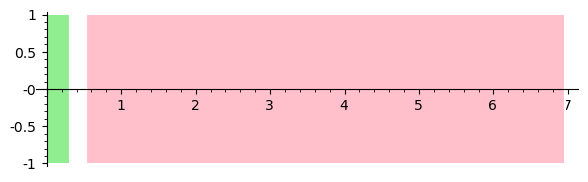

In [179]:
test_monitoring(Atomic(var("x8") <= 0.8), 7, symbolic_composition=True)[1].plot()

Precomposed systems in 5.7220458984375e-06 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 1019.4596092700958 sec
PolyObserver(-x8 + 0.80000000000000005?

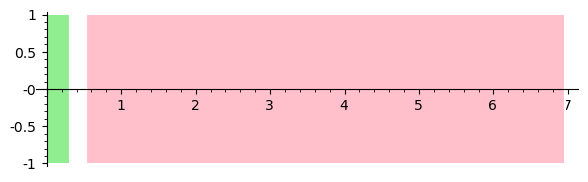

In [180]:
test_monitoring(Atomic(var("x8") <= 0.8), 7, symbolic_composition=True, masks=True)[1].plot()

Precomposed systems in 5.7220458984375e-06 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 1027.727126121521 sec
PolyObserver(-x8 + 0.80000000000000005?,

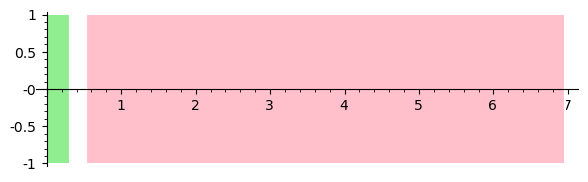

In [181]:
test_monitoring(Atomic(var("x8") <= 0.8), 7, symbolic_composition=True, masks=True, tentative_unpreconditioning=False)[1].plot()

Precomposed systems in 7.62939453125e-06 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 1045.4937002658844 sec
PolyObserver(-x8 + 0.80000000000000005?, 

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


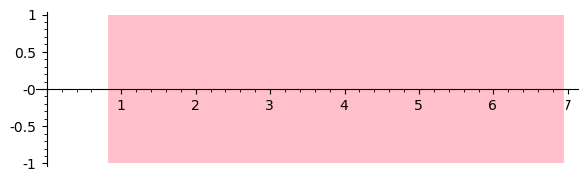

In [182]:
test_monitoring(Atomic(var("x8") <= 0.8), 7, global_root_detection=True)[1].plot()

In [195]:
prop = F(RIF(2.5, 3), Atomic(var("x6") < RIF('0.8')) & Atomic(var("x4") > RIF('0.005')))
prop

F([2.5000000000000000 .. 3.0000000000000000], And([Atomic(x6 < 0.8000000000000000?), Atomic(x4 > 0.005000000000000000?)]))

Precomposed systems in 6.842613220214844e-05 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 1031.9419646263123 sec
PolyObserver(-x6 + 0.8000000000000000

/home/twright/Drive/Documents/PhD/Notebooks/ulbc/interval_signals.py:224: UserWarning: Inconsistent intervals [-1.9385661554348024 .. -0.0000000000000000] (False) and [-0.25749553929508152 .. -0.0000000000000000] (True) in signal!
  u.str(style='brackets'), bu))
/home/twright/Drive/Documents/PhD/Notebooks/ulbc/interval_signals.py:224: UserWarning: Inconsistent intervals [-1.9385661554348024 .. -0.0000000000000000] (False) and [-0.25935767881337668 .. -0.0000000000000000] (True) in signal!
  u.str(style='brackets'), bu))


Monitored signal in 175.58178901672363 sec
Run done in 1208.807234287262 sec
options: {}


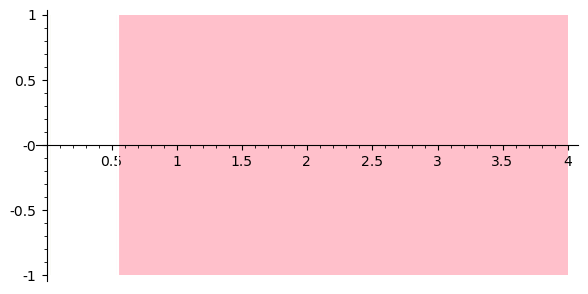

In [184]:
test_monitoring(prop, 4)[1].plot()

Precomposed systems in 6.818771362304688e-05 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 1045.743299484253 sec
PolyObserver(-x6 + 0.8000000000000000?

/home/twright/Drive/Documents/PhD/Notebooks/ulbc/interval_signals.py:224: UserWarning: Inconsistent intervals [-1.9203601492562493 .. -0.0000000000000000] (False) and [-0.032129071004428856 .. -0.0000000000000000] (True) in signal!
  u.str(style='brackets'), bu))
/home/twright/Drive/Documents/PhD/Notebooks/ulbc/interval_signals.py:224: UserWarning: Inconsistent intervals [-1.9203601492562493 .. -0.0000000000000000] (False) and [-0.034110186978247193 .. -0.0000000000000000] (True) in signal!
  u.str(style='brackets'), bu))


Monitored signal in 154.1560070514679 sec
Run done in 1201.1887822151184 sec
options: {'symbolic_composition': True}


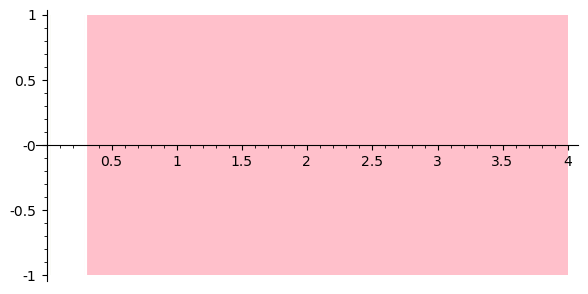

In [185]:
test_monitoring(prop, 4, symbolic_composition=True)[1].plot()

Precomposed systems in 7.081031799316406e-05 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 961.7340021133423 sec
PolyObserver(-x6 + 0.8000000000000000?

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


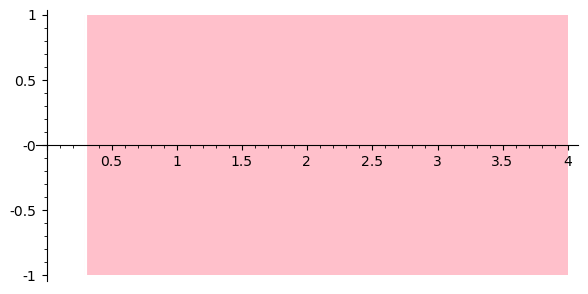

In [196]:
test_monitoring(prop, 4, symbolic_composition=True, use_masks=True)[1].plot()

Precomposed systems in 4.38690185546875e-05 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 1044.1539001464844 sec
PolyObserver(-x6 + 0.8000000000000000?

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


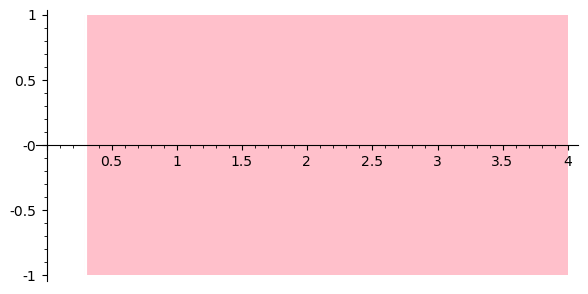

In [197]:
test_monitoring(prop, 4, symbolic_composition=True, use_masks=True, tentative_unpreconditioning=False)[1].plot()

Precomposed systems in 4.792213439941406e-05 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 1051.1819305419922 sec
PolyObserver(-x6 + 0.8000000000000000

/home/twright/Drive/Documents/PhD/Notebooks/ulbc/interval_signals.py:224: UserWarning: Inconsistent intervals [-2.1342142906626771 .. -0.0000000000000000] (False) and [-0.74982214656577551 .. -0.0000000000000000] (True) in signal!
  u.str(style='brackets'), bu))


Monitored signal in 774.2337176799774 sec
Run done in 1827.3057084083557 sec
options: {'global_root_detection': True}


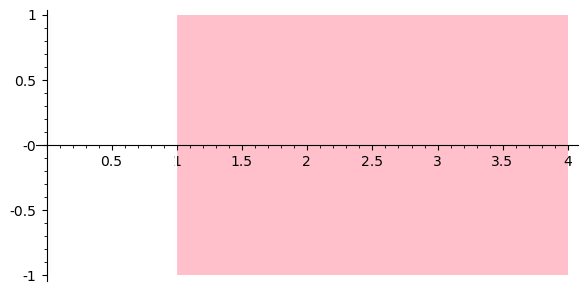

In [188]:
test_monitoring(prop, 4, global_root_detection=True)[1].plot()

Precomposed systems in 4.458427429199219e-05 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2667 flowpipes in 1213.999365568161 sec
PolyObserver(-x6 + 0.8000000000000000?

/home/twright/Drive/Documents/PhD/Notebooks/ulbc/interval_signals.py:224: UserWarning: Inconsistent intervals [-1.9385661554348024 .. -0.0000000000000000] (False) and [-0.25749553929508152 .. -0.0000000000000000] (True) in signal!
  u.str(style='brackets'), bu))
/home/twright/Drive/Documents/PhD/Notebooks/ulbc/interval_signals.py:224: UserWarning: Inconsistent intervals [-1.9385661554348024 .. -0.0000000000000000] (False) and [-0.25935767881337668 .. -0.0000000000000000] (True) in signal!
  u.str(style='brackets'), bu))


Monitored signal in 208.91686272621155 sec
Run done in 1424.384161233902 sec
options: {}


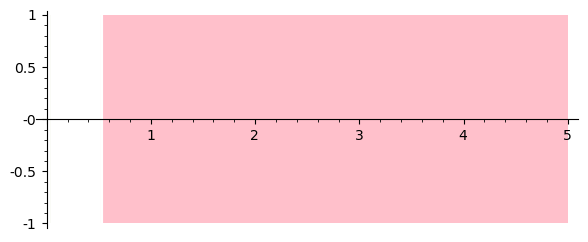

In [189]:
test_monitoring(prop, 5)[1].plot()

Precomposed systems in 4.3392181396484375e-05 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2667 flowpipes in 1202.4074296951294 sec
PolyObserver(-x6 + 0.800000000000000

/home/twright/Drive/Documents/PhD/Notebooks/ulbc/interval_signals.py:224: UserWarning: Inconsistent intervals [-1.9203601492562493 .. -0.0000000000000000] (False) and [-0.032129071004428856 .. -0.0000000000000000] (True) in signal!
  u.str(style='brackets'), bu))
/home/twright/Drive/Documents/PhD/Notebooks/ulbc/interval_signals.py:224: UserWarning: Inconsistent intervals [-1.9203601492562493 .. -0.0000000000000000] (False) and [-0.034110186978247193 .. -0.0000000000000000] (True) in signal!
  u.str(style='brackets'), bu))


Monitored signal in 157.9740743637085 sec
Run done in 1361.7650475502014 sec
options: {'symbolic_composition': True}


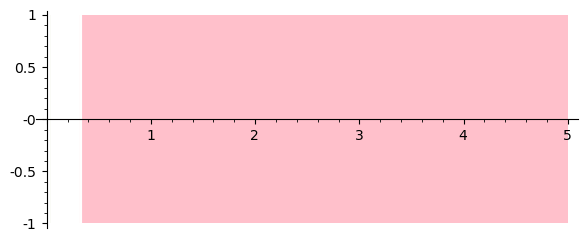

In [198]:
test_monitoring(prop, 5, symbolic_composition=True)[1].plot()

Precomposed systems in 6.937980651855469e-05 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2667 flowpipes in 1231.8119995594025 sec
PolyObserver(-x6 + 0.8000000000000000

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


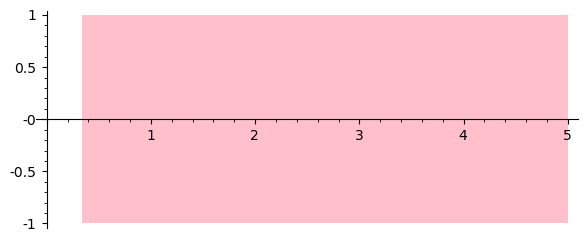

In [199]:
test_monitoring(prop, 5, symbolic_composition=True, use_masks=True)[1].plot()

In [191]:
prop = F([0, 0.5], Atomic(var("x6") > 1.4) & G([0, 0.1], Atomic(var("x6") < 1.8)  & F([0, 1], Atomic(var("x6") < 1) & Atomic(var("x4") < 0.02))))

Precomposed systems in 8.559226989746094e-05 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 1201 flowpipes in 782.1058676242828 sec
PolyObserver(x6 - 1.4000000000000000?,

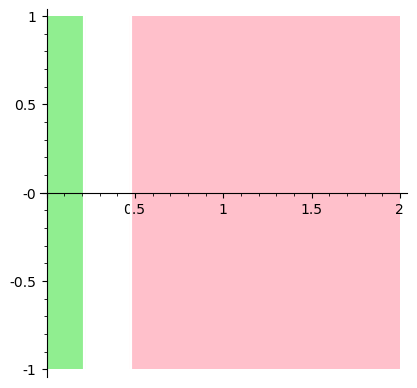

In [192]:
test_monitoring(prop, 2)[1].plot()

Precomposed systems in 8.106231689453125e-05 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 1201 flowpipes in 696.786777973175 sec
PolyObserver(x6 - 1.4000000000000000?, 

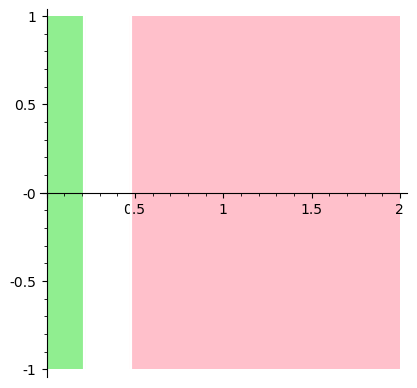

In [193]:
test_monitoring(prop, 2, symbolic_composition=True)[1].plot()

Precomposed systems in 9.298324584960938e-05 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 1201 flowpipes in 671.69602394104 sec
PolyObserver(x6 - 1.4000000000000000?, <

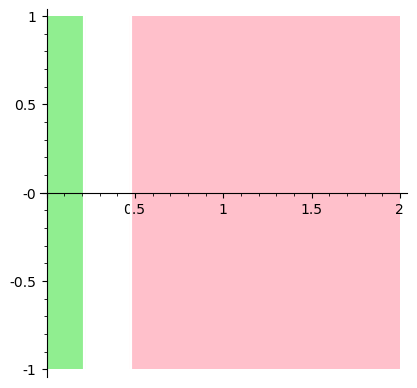

In [194]:
test_monitoring(prop, 2, symbolic_composition=True, use_masks=True)[1].plot()